
<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# K-Means Clustering


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn's K-Means Clustering to cluster data


## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import libraries
Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!


First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


## Random seed 🎲 

So, you know how sometimes we flip a coin or roll a die to get a random result? Like, heads or tails, or a number between 1 and 6?

Well, computers can also generate random numbers, but they need a little help to do it. That's where np.random.seed(0) comes in!

np.random is like a special tool in the computer that can generate random numbers. It's like a super-powerful coin flipper or die roller!

The seed part is like a special setting that we give to the random number generator. It's like a secret code that helps the computer decide how to generate the random numbers.

When we set the seed to 0, like this: np.random.seed(0), we're telling the computer to use a specific recipe to generate the random numbers. It's like giving the computer a special key to unlock a specific sequence of random numbers.

Here's the cool thing about setting the seed: if we set it to the same number every time, like 0, the computer will generate the same sequence of random numbers every time! It's like getting the same result every time you flip a coin or roll a die, which can be really helpful when we're testing or debugging our code.

So, why do we want to do this? Well, sometimes we want to make sure that our code behaves the same way every time we run it, even if it involves random numbers. By setting the seed, we can make sure that the computer generates the same random numbers every time, which can help us get consistent results and make our code more predictable.

In [3]:

# Set the random seed to 0, so that the computer generates the same
# sequence of random numbers every time
np.random.seed(110)


Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [4]:
# Import the make_blobs function from scikit-learn, 
# which generates isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs

# Generate a dataset with 5000 samples, 4 clusters, 
# and a standard deviation of 0.9 for each cluster.
# The cluster centers are specified as [[4,4], [-2, -1], [2, -3], [1, 1]],
# which means we have 4 clusters.
# The make_blobs function returns two values: 
# X (the feature data) and y (the target or response variable).
X, y = make_blobs(n_samples=5000, 
                  centers=[[4,4], [-2, -1], [2, -3], [1, 1]], 
                  cluster_std=0.9)


In [5]:
X,y

(array([[-2.74046544, -0.85333176],
        [ 2.39574349,  5.20403478],
        [ 2.30550701,  3.28750503],
        ...,
        [-2.49759388,  0.11026882],
        [ 3.58802951,  1.91316755],
        [ 4.95335329,  5.1415803 ]]),
 array([1, 0, 0, ..., 1, 0, 0]))

Display the scatter plot of the randomly generated data.


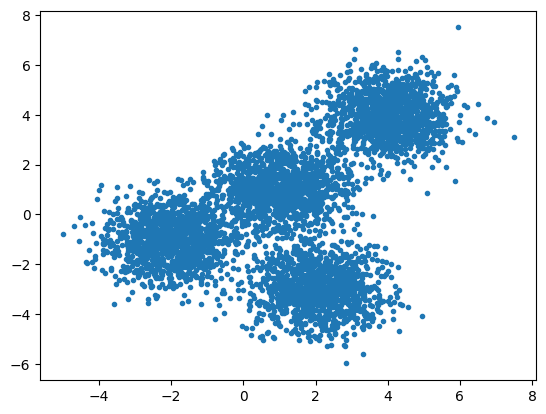

In [6]:
plt.scatter(
    X[:,0],
    X[:,1],
    marker='.'
)

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [13]:
k_means = KMeans(
    # Method for initializing the centroids (cluster centers)
    # "k-means++" is a popular initialization method that helps to avoid local optima
    # and improves the convergence of the algorithm
    init = "k-means++", 
    # Number of clusters (centroids) to identify in the data
    # In this case, the algorithm will try to group the data into 4 clusters
    n_clusters = 4, 
    # Number of times to run the algorithm with different initializations
    # The final result will be the one with the lowest sum of squared distances
    # between data points and their assigned centroids
    # Running the algorithm multiple times with different initializations can help
    # to avoid local optima and improve the quality of the clustering results
    n_init = 12
)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.


In [14]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.


In [15]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 1, 1, ..., 0, 1, 1])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>.


In [16]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.00674997, -1.0222902 ],
       [ 4.00654522,  4.00578039],
       [ 2.03755765, -2.99804291],
       [ 1.04521225,  1.04935504]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


Please read through the code and comments to understand how to plot the model.


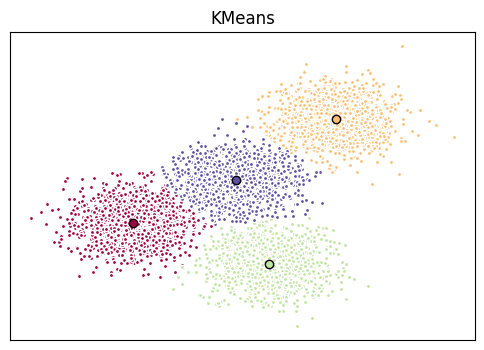

In [17]:
# Initialize the plot with the specified dimensions.
# The figsize parameter sets the width and height of the figure in inches.
# In this case, the figure will be 6 inches wide and 4 inches tall.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels. This is because we want a different color for each cluster.
# The plt.cm.Spectral function is a built-in color map in matplotlib that
# produces a range of colors from blue to red. The np.linspace function
# generates an array of evenly spaced values over a specified range.
# In this case, we're generating an array of values from 0 to 1, with the
# same length as the number of unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
# The fig.add_subplot function adds a subplot to the figure.
# The parameters (1, 1, 1) mean that we're creating a single plot that
# takes up the entire figure.
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in. The zip function is used to iterate over two lists
# in parallel: the range of cluster indices and the colors array.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false. This is done using boolean indexing, where
    # k_means_labels == k returns a boolean array indicating which data
    # points are in cluster k.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center. This is the mean value of
    # all data points in the cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    # The ax.plot function plots a set of points on the axes.
    # The X[my_members, 0] and X[my_members, 1] arrays contain the x and y
    # coordinates of the data points in the cluster, respectively.
    # The 'w' parameter sets the marker edge color to white, and the
    # markerfacecolor parameter sets the marker face color to the current
    # color in the colors array. The marker parameter sets the marker type
    # to a dot.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    # The ax.plot function is used again to plot the centroid.
    # The cluster_center[0] and cluster_center[1] values contain the x and y
    # coordinates of the centroid, respectively.
    # The 'o' parameter sets the marker type to a circle, and the
    # markerfacecolor parameter sets the marker face color to the current
    # color in the colors array. The markeredgecolor parameter sets the
    # marker edge color to black, and the markersize parameter sets the
    # marker size to 6.
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
# The ax.set_title function sets the title of the plot.
ax.set_title('KMeans')

# Remove x-axis ticks
# The ax.set_xticks function sets the x-axis tick locations.
# Passing an empty tuple () removes all ticks.
ax.set_xticks(())

# Remove y-axis ticks
# The ax.set_yticks function sets the y-axis tick locations.
# Passing an empty tuple () removes all ticks.
ax.set_yticks(())

# Show the plot
# The plt.show function displays the plot.
plt.show()

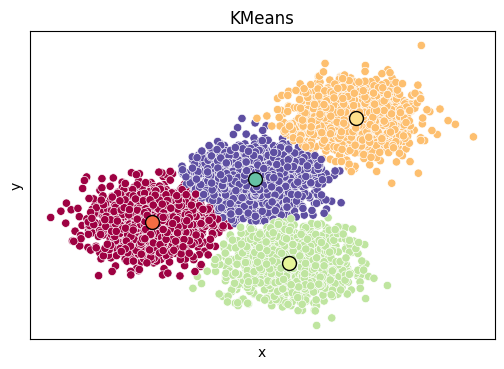

In [18]:
# Import necessary libraries
import seaborn as sns  # for creating informative and attractive statistical graphics
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations
import numpy as np  # for numerical computations
import pandas as pd  # for data manipulation and analysis

# Assume k_means_labels and k_means_cluster_centers are already defined
# Assume X is your data

# Create a DataFrame from the data for easier plotting with Seaborn
df = pd.DataFrame(X, columns=['x', 'y'])  # create a DataFrame with columns x and y
df['label'] = k_means_labels  # add a new column 'label' to the DataFrame

# Plot the data points
plt.figure(figsize=(6, 4))  # set the figure size
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='Spectral', legend=None)  # plot the data points with different colors for each label

# Plot the centroids
for k, col in zip(range(len(k_means_cluster_centers)), sns.color_palette('Spectral', len(np.unique(k_means_labels)))):
    cluster_center = k_means_cluster_centers[k]  # get the k-th cluster center
    plt.scatter(cluster_center[0], cluster_center[1], s=100, c=[col], edgecolor='k')  # plot the centroid with a large size and black edge "THE  DOTS  IN MIDDLE OF CENTERS"

# Finalize the plot
plt.title('KMeans')  # set the title of the plot
plt.xticks([])  # remove x-axis ticks
plt.yticks([])  # remove y-axis ticks
plt.show()  # display the plot

### EXPLAINATIONS

In [19]:
len(k_means_cluster_centers)

4

In [20]:
np.unique(k_means_labels)

array([0, 1, 2, 3])

In [21]:
tuple(zip(range(len(k_means_cluster_centers)), sns.color_palette('Spectral', len(np.unique(k_means_labels)))))

((0, (0.9568627450980393, 0.42745098039215684, 0.2627450980392157)),
 (1, (0.996078431372549, 0.8784313725490196, 0.5450980392156862)),
 (2, (0.9019607843137256, 0.9607843137254902, 0.5960784313725491)),
 (3, (0.4, 0.7607843137254902, 0.6470588235294118)))

In [22]:
df

,x,y,label
0,-2.740465,-0.853332,0
1,2.395743,5.204035,1
2,2.305507,3.287505,1
3,-2.478698,-0.353579,0
4,0.705938,0.446522,3
...,...,...,...
4995,0.251665,-2.887584,2
4996,-1.974219,-0.185817,0
4997,-2.497594,0.110269,0
4998,3.588030,1.913168,1


## Practice
Try to cluster the above dataset into 3 clusters.  
Notice: do not generate the data again, use the same dataset as above.


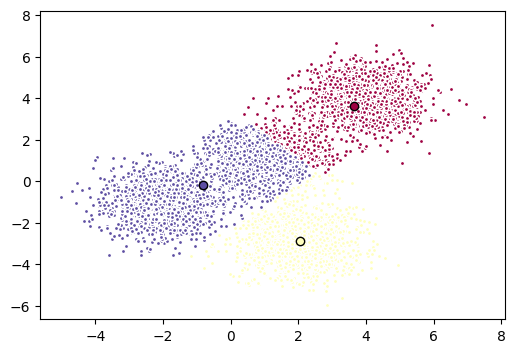

In [24]:
# write your code here
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


<details><summary>Click here for the solution</summary>

```python
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

```

</details>


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


### Load Data From CSV File  
Before you can work with the data, let's use pandas to read the dataset from IBM Object Storage.


In [25]:
import pandas as pd
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [30]:
cust_df.to_csv('Cust_Segmentation.csv')

In [26]:
# cust_df.to_csv('Cust_Segmentation.csv')
cust_df = pd.read_csv('Cust_Segmentation.csv')
cust_df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


As you can see, __Address__ in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [27]:
df = cust_df.drop('Address', axis=1)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.


In [33]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.90913822,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [39]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [41]:
df["Clus_km"] = labels
df.head(5)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


We can easily check the centroid values by averaging the features in each cluster.


In [56]:
df.groupby('Clus_km').mean()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,,
0,706.5,707.5,34.664336,1.702797,8.125874,45.293706,1.529566,3.034357,0.242678,10.096154
1,140.0,141.0,34.718861,1.782918,8.750890,46.644128,1.535975,2.903171,0.247748,9.791815
2,422.0,423.0,35.706714,1.646643,8.826855,48.102473,1.665131,3.298021,0.292887,10.625088


In [62]:
df.groupby('Clus_km').max()


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,,
0,849,850,56,5,33,324,9.877,27.034,1.0,36.6
1,280,281,56,5,31,253,20.561,23.104,1.0,32.5
2,563,564,55,5,31,446,16.031,35.197,1.0,41.3


In [63]:
df.groupby('Clus_km').min()


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,,
0,564,565,21,1,0,14,0.025,0.046,0.0,0.7
1,0,1,20,1,0,13,0.022,0.053,0.0,0.1
2,281,282,20,1,0,14,0.012,0.101,0.0,0.4


Now, let's look at the distribution of customers based on their age and income:


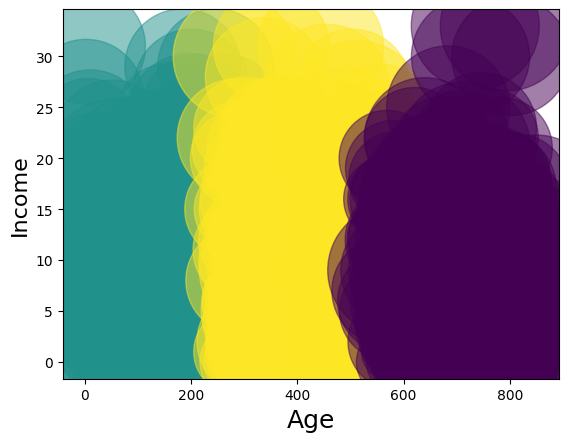

In [50]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float32), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


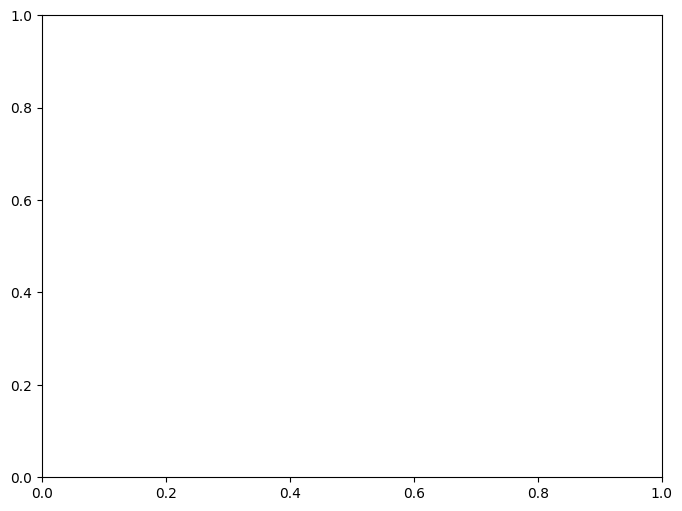

In [49]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float32))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03  | 2.1  | Lakshmi  |  Updated URL of csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


# Heiraical clustering and k-means the loyal spouse of all clusting!

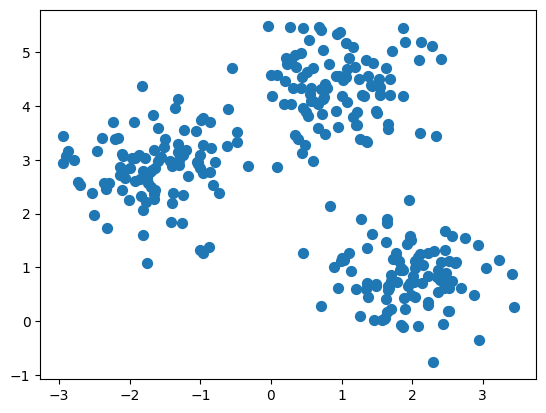

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, true_labels = make_blobs(n_samples=300,
                               centers=3,
                               cluster_std=0.60,
                               random_state=0)

# Plot the data
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.show()


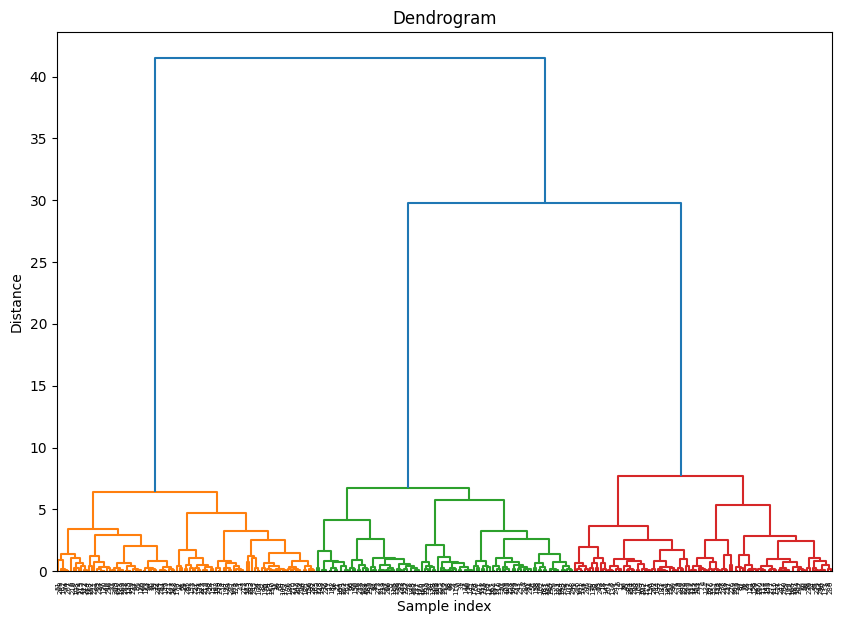

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using Ward's method
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


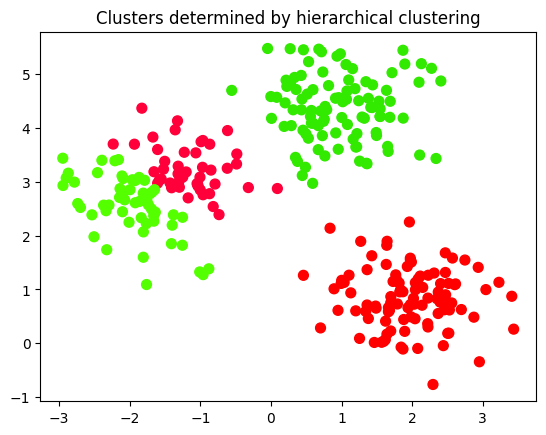

In [4]:
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters by setting a cutoff distance
max_d = 7.5  # This is an example value; adjust based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Plot the clustered data
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='prism', s=50)
plt.title('Clusters determined by hierarchical clustering')
plt.show()


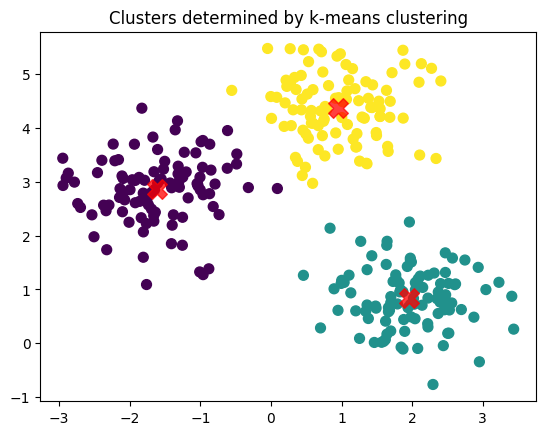

In [5]:
from sklearn.cluster import KMeans

# Determine number of clusters from hierarchical clustering
num_clusters = 3  # Determined from the dendrogram

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data)
kmeans_labels = kmeans.labels_

# Plot the k-means clustered data
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clusters determined by k-means clustering')
plt.show()
